In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    # Вычисляем размерность входной матрицы (размер изображения)
    image_height, image_width = image.shape
    # Вычисляем размерность матрицы ядра
    kernel_height, kernel_width = kernel.shape

    # Вычисляем размерность выходной матрицы
    output_height = image_height - kernel_height + 1 # Высота матрицы
    output_width = image_width - kernel_width + 1 # Ширина матрицы
    #тут мы как бы прокатываем ядро по исходной матрице

    # Создаем "болванку" для выходной матрицы вычисленной размерности
    # Популируем матрицу нулями
    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Операция свертки
    # Для каждого компонента матрицы по высоте
    for i in range(output_height):
        # Для каждого компонента матрицы по ширине
        for j in range(output_width):
            # Значение компонента одной ячейки матрицы (пересечение высоты и ширины)
            # Значение вычисляем как сумму текущего компонента входной матрицы
            # Текущий компонент - это ячейка из одного или нескольких чисел в диапазоне размера ядра
            # Производим element-wise / покомпонентное умножение ячейки матрицы в размере ядра на непосредственно ядро
            #крч матрица из соответствий следа ядра его сущности
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)
    return output


In [ ]:
# Тестовое изображение (число обозначает насыщенность цвета)
image = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])
# Тестовое ядро
kernel = np.array([[1, 0],
                   [0, -1]])

# Производим свертку
output = convolve2d(image, kernel)

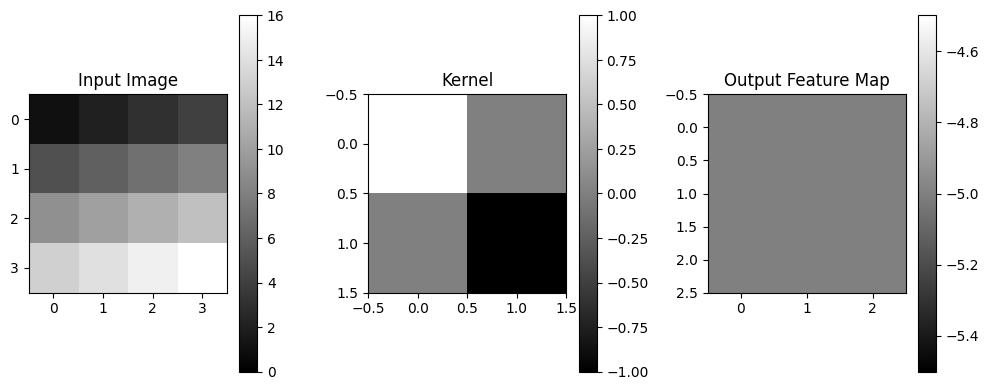

In [ ]:
# Визуализация
plt.figure(figsize=(10, 4))

# Производим мэппинг числовых значений на оттенки серого
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image, cmap='gray', vmin=0, vmax=16)
plt.colorbar()

# Отрисовка ядра
plt.subplot(1, 3, 2)
plt.title("Kernel")
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
plt.colorbar()

# Отрисовка выходной матрицы: здесь нам удалось выявить "среднестатистический", наиболее репрезентативный или преобладающий цвет
plt.subplot(1, 3, 3)
plt.title("Output Feature Map")
plt.imshow(output, cmap='gray')
plt.colorbar()

plt.tight_layout() #чтобы избежать наложения
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

# Подгружае тестовое изображение
image = Image.open("Monarch-Butterfly-scaled.jpg").convert("L")  # Режим "L" преобразовывает изображение к виду оттенков серого
image = np.array(image)  # Создаем числовое представление изображения

In [ ]:
print(image)

[[237 237 237 ... 171 171 171]
 [237 237 237 ... 171 171 171]
 [237 237 237 ... 171 171 171]
 ...
 [159 159 159 ... 105 106 106]
 [159 159 159 ... 105 106 106]
 [159 159 159 ... 105 106 106]]


In [ ]:
# Задаем матрицы ядер
# Ядро для определения углов
kernel_edge = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# Ядро для размытия
kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]])

# Ядро для повышения резкости
kernel_sharpen = np.array([[ 0, -1,  0],
                          [-1,  5, -1],
                          [ 0, -1,  0]])

constant:
The input is extended by filling all values beyond the edge with the same constant value, defined by the cval parameter.
cval:
Value to fill past edges of input if mode is ‘constant’. Default is 0.0.

In [ ]:
# Создаем три варианта выходных матриц
# Здесь мы используем готовый метод convolve
output_edge = convolve(image, kernel_edge, mode='constant', cval=0.0)
output_blur = convolve(image, kernel_blur, mode='constant', cval=0.0)
output_sharpen = convolve(image, kernel_sharpen, mode='constant', cval=0.0)

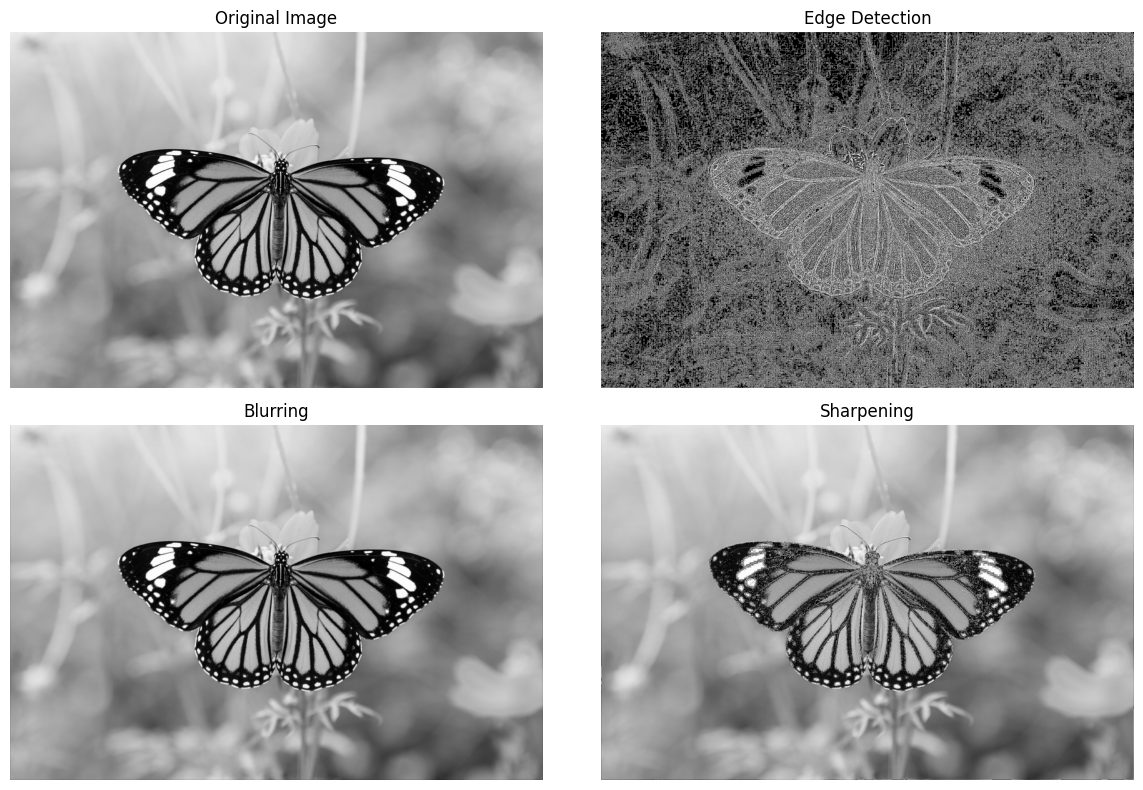

In [ ]:
# Задаем изображение
plt.figure(figsize=(12, 8))

# Исходное изображение
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Выделение краев
plt.subplot(2, 2, 2)
plt.title("Edge Detection")
plt.imshow(output_edge, cmap='gray')
plt.axis('off')

# Блур
plt.subplot(2, 2, 3)
plt.title("Blurring")
plt.imshow(output_blur, cmap='gray')
plt.axis('off')

# Резкость
plt.subplot(2, 2, 4)
plt.title("Sharpening")
plt.imshow(output_sharpen, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.9144 - loss: 0.2801 - val_accuracy: 0.9819 - val_loss: 0.0600
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9859 - loss: 0.0461 - val_accuracy: 0.9882 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9869 - val_loss: 0.0359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9895 - val_loss: 0.0338
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9954 - loss: 0.0156 - val_accuracy: 0.9911 - val_loss: 0.0313
313/313 - 3s - 10ms/step - accuracy: 0.9911 - loss: 0.0313
Test accuracy: 0.9911


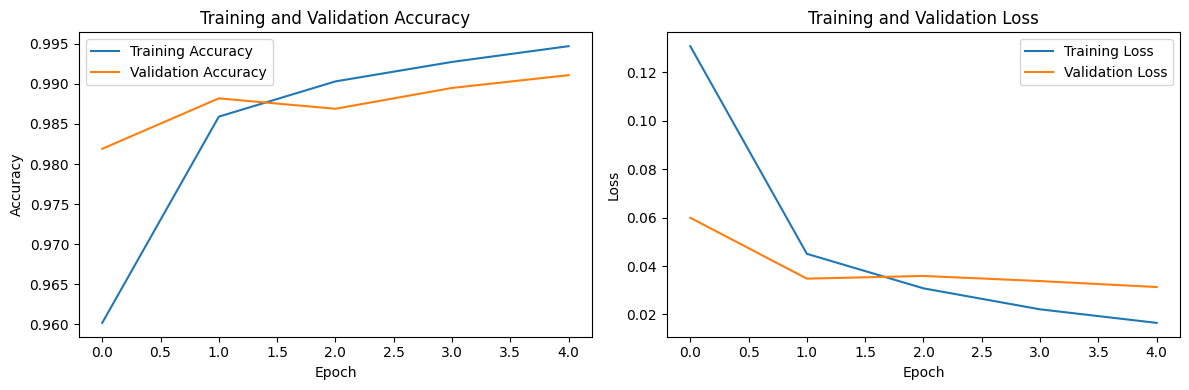

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Загружаем MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Препроцессинг
# Регуляризация значений в диапазоне [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Решейпинг: изменение "формы" матрицы. есть тензор - массив данных, а решейп позволяет изменить форму, например, преобразовать одномерный
# набор данных в матрицу, при этом не меняя сами данные (1 строка 0 столбцов --> 5 строк 3 столбца); -1 - достаем количество данных;
# 28, 28 - количество строк столбцов; 1 - количество каналов (ч/б)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Выстраиваем модель
# Sequential groups a linear stack of layers into a Model.
model = models.Sequential([
    # Первый сверточный слой
    # 32 - the number of filters in the convolution; (3,3) - the size of the kernel
    # relu - если значение отрицательно, то 0
    # на выходе - матрица 28*28, ч/б
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # pool_size = (2,2) - factors by which to downscale. мы уменьшаем размерность, выбирая в данном случае окно 2*2 которое скользит и выбирает максимальное значение из четырех клеточек
    layers.MaxPooling2D((2, 2)),

    # Второй сверточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # преобразование в одномерный массив
    layers.Flatten(),

    # Почему здесь мы используем 2 функции активации?
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Выходной слой, что означает 10?
])

# Собираем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Оцениваем модель
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Отрисовка графика прогресса обучения
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
